# Text Classification:

## Data
<pre>
1. we have total of 20 types of documents(Text files) and total 18828 documents(text files).
2. You can download data from this <a href='https://drive.google.com/open?id=1rxD15nyeIPIAZ-J2VYPrDRZI66-TBWvM'>link</a>, in that you will get documents.rar folder. <br>If you unzip that, you will get total of 18828 documnets. document name is defined as'ClassLabel_DocumentNumberInThatLabel'. 
so from document name, you can extract the label for that document.
4. Now our problem is to classify all the documents into any one of the class.
5. Below we provided count plot of all the labels in our data. 
</pre>

<IPython.core.display.Javascript object>


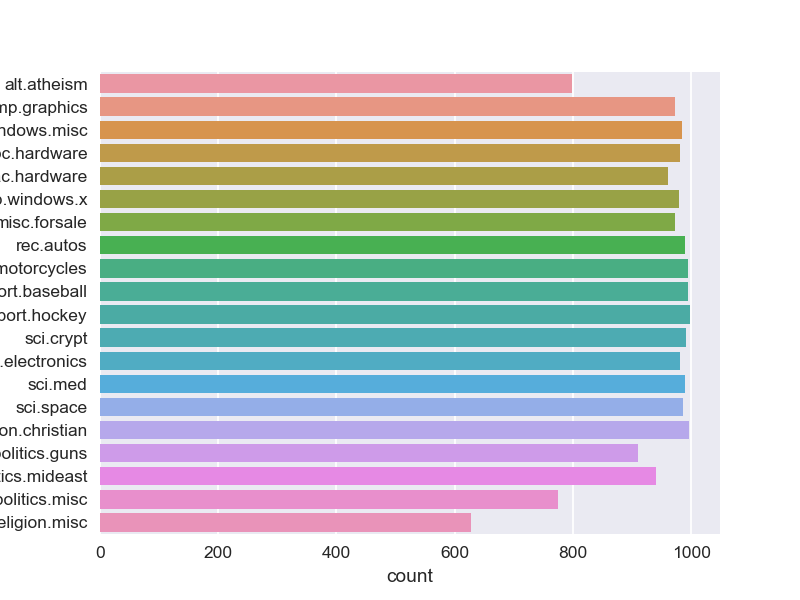

In [ ]:
### count plot of all the class labels. 

#### sample document
<pre>
<font color='blue'>
Subject: A word of advice
From: jcopelan@nyx.cs.du.edu (The One and Only)

In article < 65882@mimsy.umd.edu > mangoe@cs.umd.edu (Charley Wingate) writes:
>
>I've said 100 times that there is no "alternative" that should think you
>might have caught on by now.  And there is no "alternative", but the point
>is, "rationality" isn't an alternative either.  The problems of metaphysical
>and religious knowledge are unsolvable-- or I should say, humans cannot
>solve them.

How does that saying go: Those who say it can't be done shouldn't interrupt
those who are doing it.

Jim
--
Have you washed your brain today?
</font>
</pre>

### Preprocessing:
<pre>
useful links: <a href='http://www.pyregex.com/'>http://www.pyregex.com/</a>

<font color='blue'><b>1.</b></font> Find all emails in the document and then get the text after the "@". and then split those texts by '.' 
after that remove the words whose length is less than or equal to 2 and also remove'com' word and then combine those words by space. 
In one doc, if we have 2 or more mails, get all.
<b>Eg:[test@dm1.d.com, test2@dm2.dm3.com]-->[dm1.d.com, dm3.dm4.com]-->[dm1,d,com,dm2,dm3,com]-->[dm1,dm2,dm3]-->"dm1 dm2 dm3" </b> 
append all those into one list/array. ( This will give length of 18828 sentences i.e one list for each of the document). 
Some sample output was shown below. 

> In the above sample document there are emails [jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu]

preprocessing:
[jcopelan@nyx.cs.du.edu, 65882@mimsy.umd.edu, mangoe@cs.umd.edu] ==> [nyx cs du edu mimsy umd edu cs umd edu] ==> 
[nyx edu mimsy umd edu umd edu]

<font color='blue'><b>2.</b></font> Replace all the emails by space in the original text. 
</pre>

In [ ]:
# we have collected all emails and preprocessed them, this is sample output
preprocessed_email

array(['juliet caltech edu',
       'coding bchs edu newsgate sps mot austlcm sps mot austlcm sps mot com  dna bchs edu',
       'batman bmd trw', ..., 'rbdc wsnc org dscomsa desy zeus  desy',
       'rbdc wsnc org morrow stanford edu pangea Stanford EDU',
       'rbdc wsnc org apollo apollo'], dtype=object)

In [ ]:
len(preprocessed_email)

18828

<pre>
<font color='blue'><b>3.</b></font> Get subject of the text i.e. get the total lines where "Subject:" occur and remove 
the word which are before the ":" remove the newlines, tabs, punctuations, any special chars.
<b>Eg: if we have sentance like "Subject: Re: Gospel Dating @ \r\r\n" --> You have to get "Gospel Dating"</b> 
Save all this data into another list/array. 

<font color='blue'><b>4.</b></font> After you store it in the list, Replace those sentances in original text by space.

<font color='blue'><b>5.</b></font> Delete all the sentances where sentence starts with <b>"Write to:"</b> or <b>"From:"</b>.
> In the above sample document check the 2nd line, we should remove that

<font color='blue'><b>6.</b></font> Delete all the tags like "< anyword >"
> In the above sample document check the 4nd line, we should remove that "< 65882@mimsy.umd.edu >"


<font color='blue'><b>7.</b></font> Delete all the data which are present in the brackets. 
In many text data, we observed that, they maintained the explanation of sentence 
or translation of sentence to another language in brackets so remove all those.
<b>Eg: "AAIC-The course that gets you HIRED(AAIC - Der Kurs, der Sie anstellt)" --> "AAIC-The course that gets you HIRED"</b>

> In the above sample document check the 4nd line, we should remove that "(Charley Wingate)"


<font color='blue'><b>8.</b></font> Remove all the newlines('\n'), tabs('\t'), "-", "\".

<font color='blue'><b>9.</b></font> Remove all the words which ends with <b>":"</b>.
<b>Eg: "Anyword:"</b>
> In the above sample document check the 4nd line, we should remove that "writes:"


<font color='blue'><b>10.</b></font> Decontractions, replace words like below to full words. 
please check the donors choose preprocessing for this 
<b>Eg: can't -> can not, 's -> is, i've -> i have, i'm -> i am, you're -> you are, i'll --> i will </b>

<b> There is no order to do point 6 to 10. but you have to get final output correctly</b>

<font color='blue'><b>11.</b></font> Do chunking on the text you have after above preprocessing. 
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating <b>"_"</b>. 
And remove the phrases/named entities if that is a "Person". 
You can use <b>nltk.ne_chunk</b> to get these. 
Below we have given one example. please go through it. 

useful links: 
<a href='https://www.nltk.org/book/ch07.html'>https://www.nltk.org/book/ch07.html</a>
<a href='https://stackoverflow.com/a/31837224/4084039'>https://stackoverflow.com/a/31837224/4084039</a>
<a href='http://www.nltk.org/howto/tree.html'>http://www.nltk.org/howto/tree.html</a>
<a href='https://stackoverflow.com/a/44294377/4084039'>https://stackoverflow.com/a/44294377/4084039</a>
</pre>

In [ ]:
#i am living in the New York
print("i am living in the New York -->", list(chunks))
print(" ")
print("-"*50)
print(" ")
#My name is Srikanth Varma
print("My name is Srikanth Varma -->", list(chunks1))

i am living in the New York --> [('i', 'NN'), ('am', 'VBP'), ('living', 'VBG'), ('in', 'IN'), ('the', 'DT'), Tree('GPE', [('New', 'NNP'), ('York', 'NNP')])]
 
--------------------------------------------------
 
My name is Srikanth Varma --> [('My', 'PRP$'), ('name', 'NN'), ('is', 'VBZ'), Tree('PERSON', [('Srikanth', 'NNP'), ('Varma', 'NNP')])]


<pre>We did chunking for above two lines and then We got one list where each word is mapped to a 
POS(parts of speech) and also if you see "New York" and "Srikanth Varma", 
they got combined and represented as a tree and "New York" was referred as "GPE" and "Srikanth Varma" was referred as "PERSON". 
so now you have to Combine the "New York" with <b>"_"</b> i.e "New_York"
and remove the "Srikanth Varma" from the above sentence because it is a person.</pre>

<pre>
<font color='blue'><b>13.</b></font> Replace all the digits with space i.e delete all the digits. 
> In the above sample document, the 6th line have digit 100, so we have to remove that.

<font color='blue'><b>14.</b></font> After doing above points, we observed there might be few word's like
 <b> "_word_" (i.e starting and ending with the _), "_word" (i.e starting with the _),
  "word_" (i.e ending with the _)</b> remove the <b>_</b> from these type of words. 

<font color='blue'><b>15.</b></font>  We also observed some words like <b> "OneLetter_word"- eg: d_berlin, 
"TwoLetters_word" - eg: dr_berlin </b>, in these words we remove the "OneLetter_" (d_berlin ==> berlin) and 
"TwoLetters_" (de_berlin ==> berlin). i.e remove the words 
which are length less than or equal to 2 after spliiting those words by "_". 

<font color='blue'><b>16.</b></font> Convert all the words into lower case and lowe case 
and remove the words which are greater than or equal to 15 or less than or equal to 2.

<font color='blue'><b>17.</b></font> replace all the words except "A-Za-z_" with space. 

<font color='blue'><b>18.</b></font> Now You got Preprocessed Text, email, subject. create a dataframe with those. 
Below are the columns of the df. 
</pre>

In [3]:
!pip3 install pyunpack

In [ ]:
!pip3 install patool

     |████████████████████████████████| 77 kB 3.9 MB/s 


In [4]:
from pyunpack import Archive
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
my_path="/content/drive/MyDrive/document Classification"

In [ ]:
Archive("/content/drive/MyDrive/document Classification/documents.rar").extractall("/content/drive/MyDrive/document Classification")

In [6]:
import os
len(os.listdir("/content/drive/MyDrive/document Classification/documents"))

18828

In [5]:
import re
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [ ]:
text =[]
d=r"/content/drive/MyDrive/document Classification/documents"
for i in os.listdir(r"/content/drive/MyDrive/document Classification/documents"):
    fullpath=os.path.join(d,i)
    a=open(fullpath, encoding="latin1")
    text.append(a.read())

In [ ]:
len(text)

18828

In [7]:
from tqdm import tqdm
import os
classlabel=list()
files = os.listdir(r"/content/drive/MyDrive/document Classification/documents")
for filename in tqdm(files):
    index = filename.find('_') 
    classlabel.append(filename[0:index])

100%|██████████| 18828/18828 [00:00<00:00, 1149663.06it/s]


In [8]:
len(classlabel)

18828

In [ ]:
#https://stackoverflow.com/questions/17681670/extract-email-sub-strings-from-large-document
def findmailid(document):
    result=re.findall("[\w\.]+@[\w\.]+" , document) #finding email addresses
    string1=[]#create a list of preprocessing
    for k in result:
        result1=re.findall("@[\w\.-]+", k)# for text after the "@". and then split those texts by '.'
        wq=re.sub("\@", "", result1[0])
        split1=re.split("\." , wq)
        for j in split1:
            if j!='com' and len(j)>2:#for remove the words whose length is less than or equal to 2and also remove'com' word and then combine those words by space. 
                string1.append(j)
    x=" ".join(string1)
    
    return x

In [ ]:
def subject(document):
    a1=re.findall("Subject:.+", document) # finding the subject (whole line of subject)
    a2=re.sub("Subject:.+:","",a1[0]) # removing anything before :
    a3=re.sub("[^A-Za-z0-9]+"," ",a2) #removing special charcater , punctuation , newline
    return a3

In [ ]:
#By donor choose assignment.
def decontracted(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

#Chunking:
Text chunking, also referred to as shallow parsing, is a task that 
follows Part-Of-Speech Tagging and that adds more structure to the sentence.
So it combines the some phrases, named entities into single word.
So after that combine all those phrases/named entities by separating "_". 
And remove the phrases/named entities if that is a "Person". 

In [ ]:
#https://medium.com/@bhor733/data-cleaning-and-preprocessing-in-data-science-and-machine-learning-8931c36c04ed
def chunking(document):
    actual_GPE_lst=[]
    GPE_lst=[]
    person_lst=[]
    #for line in doc.split('\n'):
    for sent in nltk.sent_tokenize(document):
        for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(sent))):
            if hasattr(chunk, 'label'):
                a=chunk.label()
                if a=="GPE":
                    d=' '.join(c[0] for c in chunk)
                    actual_GPE_lst.append(d)
                    b='_'.join(c[0] for c in chunk)
                    GPE_lst.append(b)
                if a=="PERSON":
                    b=' '.join(c[0] for c in chunk)
                    person_lst.append(b)
    if len(GPE_lst)!=0:
        for i in range(len(GPE_lst)):
            if GPE_lst[i]!=actual_GPE_lst[i]:
                #document=re.sub(actual_GPE_lst[i] , GPE_lst[i] , document)
                document=document.replace(actual_GPE_lst[i], GPE_lst[i])
    
    if len(person_lst)!=0:
        for j in range(len(person_lst)):
            #document=re.sub(person_lst[j], " ", document)
            document=document.replace(person_lst[j],"")
        
    return document

In [ ]:
import nltk
import re
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


True

In [ ]:
s1="i am living in the New York and My name is Aamerkhan"
chunking(s1)

'i am living in the New_York and My name is '

In [ ]:
def removing_(document):
    rt1=[]
    a=re.findall("[_][a-zA-Z]+[_]",document)    # finding    _word_
    for i in a:
        a1=re.sub("_"," ",i)
        rt1.append(a1)
    for i in range(len(rt1)):
        document=re.sub(a[i],rt1[i],document)
        
    rt2=[]
    b=re.findall("[_][a-zA-Z]+",document)       # finding   _word
    for i in b:
        b1=re.sub("_"," ",i)
        rt2.append(b1)
    for i in range(len(rt2)):
        document=re.sub(b[i],rt2[i],document)
        
    rt3=[]
    c=re.findall("[a-zA-Z]+[_]",document)        # finding    word_
    for i in c:
        c1=re.sub("_"," ",i)
        rt3.append(c1)
    for i in range(len(rt3)):
        document=re.sub(c[i],rt3[i],document)
    
    return document

In [ ]:
#example of step14
s1="_lebron_ james is the best player in _world . leaker_ can actually win the championship this _year"
removing_(s1)

' lebron  james is the best player in  world . leaker  can actually win the championship this  year'

In [ ]:
def splitandremove_(document):
    kt1=[]
    d=re.findall("[a-zA-z][a-zA-Z]_[a-zA-Z]+",document)  #removing dr_berlin --> berlin
    for i in d:
        d1=re.split("_",i)
        kt1.append(d1[1])
    for j in range(len(kt1)):
        document=re.sub(d[j],kt1[j],document)
        
    kt2=[]
    e=re.findall("[a-zA-z]_[a-zA-Z]+",document) #removing d_berlin --> berlin
    for i in e:
        e1=re.split("_", i)
        kt2.append(e1[1])
    for j in range(len(kt2)):
        document=re.sub(e[j],kt2[j],document)
        
    return document

In [ ]:
#example of step15
s2="d_berlin dr_berlin , dr_dre is the name still running the game"
splitandremove_(s2)

'berlin berlin , dre is the name still running the game'

In [ ]:
def making_lower(document):
    document=document.lower() # making every word lower case 
    document=' '.join([w for w in document.split() if len(w)>2 and len(w)<15 ]) # removing words wich are leass than 2 and greater than 15 in length
    return document

In [ ]:
def replace(document):
    document=re.sub("[^a-zA-Z_ ]+"," ",document)
    return document

In [ ]:
def preprocess(document):
    preproessed_email=findmailid(document) 
    preproessed_subject=subject(document)
    preproessed_text1=re.sub("[\w\.]+@[\w\.]+", " ", document)#finding email addresses
    preproessed_text2=re.sub("Subject:.+"," ",preproessed_text1)# finding the subject (whole line of subject)
    preproessed_text3=re.sub("From:.+"," ",preproessed_text2)#3. Delete all the sentances where sentence starts with "Write to:" or "From:".
    preproessed_text4=re.sub("Write to:.+"," ", preproessed_text3)
    preproessed_text5=re.sub("<.*?>"," ",preproessed_text4) # 4. Delete all the tags like "< anyword >"
    preproessed_text6=re.sub("[(].+[)]"," ",preproessed_text5)# 5. Delete all the data which are present in the brackets. 
    preproessed_text7=preproessed_text6.replace("\n"," ")#6. Remove all the newlines('\n'), tabs('\t'), "-", "\".
    preproessed_text7=preproessed_text7.replace("\t"," ")
    preproessed_text7=preproessed_text7.replace("\ ", " ")
    preproessed_text7=preproessed_text7.replace("-"," ")
    preproessed_text8=re.sub("\w+:"," ",preproessed_text7)#Remove all the words which ends with ":".
    preproessed_text9=decontracted(preproessed_text8)#Decontractions, replace words like below to full words. 
    preproessed_text10=chunking(preproessed_text9)#chunking operation
    preproessed_text11=re.sub('[0-9]',' ',preproessed_text10)
    preproessed_text12=removing_(preproessed_text11) #remove operation
    preproessed_text13=splitandremove_(preproessed_text12)#splitandremove_ like removing d_berlin --> berlin
    preproessed_text14=replace(preproessed_text13)# replace all the words except "A-Za-z_" with space.
    preproessed_text15=making_lower(preproessed_text14)# making every word lower case 
    
    
    
    return preproessed_text15,preproessed_email,preproessed_subject

###To get above mentioned data frame --> Try to Write Total Preprocessing steps in One Function Named Preprocess as below.

In [ ]:
text_file=[]
preprocessed_emails=[]
preprocessed_subjects=[]
preprocessed_texts=[]
for i in tqdm(range(len(text))):
    text_file.append(text[i])
    preprocessed_text,preprocessed_email,preprocessed_subject=preprocess(text[i])
    preprocessed_emails.append(preprocessed_email)
    preprocessed_subjects.append(preprocessed_subject)
    preprocessed_texts.append(preprocessed_text)

100%|██████████| 18828/18828 [35:42<00:00,  8.79it/s]


In [ ]:
len(text_file)

18828

In [ ]:
#import pandas as pd
#data=pd.DataFrame(list(zip(text,classlabel,preprocessed_texts,preprocessed_subjects,preprocessed_emails)),columns=["text","class","preprocessed_texts","preprocessed_subjects","preprocessed_emails"])

In [ ]:
data.head()

,text,class,preprocessed_texts,preprocessed_subjects,preprocessed_emails
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,archive atheism resources alt atheism archive ...,Atheist Resources,mantis netcom mantis
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,archive atheism introduction alt atheism archi...,Introduction to Atheism,mantis mantis mantis
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,article well has quite different not necessari...,Gospel Dating,dbstu1 mimsy umd edu umd edu
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,recently ras have been ordered and none have r...,university violating separation of church state,mantis kepler unh edu
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,article ida org however hate economic terroris...,soc motss et al Princeton axes matching funds...,Watson Ibm Com harder ccr harder ccr watson ibm


In [ ]:
data.columns

Index(['text', 'class', 'preprocessed_texts', 'preprocessed_subjects',
       'preprocessed_emails'],
      dtype='object')

In [ ]:
data.iloc[5]

text                     From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...
class                                                          alt.atheism
preprocessed_texts       article did not you say was created with perfe...
preprocessed_subjects                 A visit from the Jehovah s Witnesses
preprocessed_emails                   dbstu1 batman bmd trw batman bmd trw
Name: 5, dtype: object

In [ ]:
data.iloc[400]

text                     From: perry@dsinc.com (Jim Perry)\nSubject: Re...
class                                                          alt.atheism
preprocessed_texts       this response originally fell into bit bucket ...
preprocessed_subjects                                       Biblical Rape 
preprocessed_emails      dsinc darkside osrhe uoknor edu okcforum osrhe...
Name: 400, dtype: object

In [10]:
import pandas as pd
y = pd.DataFrame(list(classlabel), 
               columns =['classlabel']) 
y.head()

,classlabel
0,talk.politics.misc
1,talk.politics.misc
2,talk.politics.misc
3,talk.politics.misc
4,talk.politics.misc


In [11]:
y['classlabel'].unique().shape

(20,)

### Training The models to Classify: 

<pre>
1. Combine "preprocessed_text", "preprocessed_subject", "preprocessed_emails" into one column. use that column to model. 

2. Now Split the data into Train and test. use 25% for test also do a stratify split. 

3. Analyze your text data and pad the sequnce if required. 
Sequnce length is not restricted, you can use anything of your choice. 
you need to give the reasoning

4. Do Tokenizer i.e convert text into numbers. please be careful while doing it. 
if you are using tf.keras "Tokenizer" API, it removes the <b>"_"</b>, but we need that.

5. code the model's ( Model-1, Model-2 ) as discussed below 
and try to optimize that models.  

6. For every model use predefined Glove vectors. 
<b>Don't train any word vectors while Training the model.</b>

7. Use "categorical_crossentropy" as Loss. 

8. Use <b>Accuracy and Micro Avgeraged F1 score</b> as your as Key metrics to evaluate your model. 

9.  Use Tensorboard to plot the loss and Metrics based on the epoches.

10. Please save your best model weights in to <b>'best_model_L.h5' ( L = 1 or 2 )</b>. 

11. You are free to choose any Activation function, learning rate, optimizer.
But have to use the same architecture which we are giving below.

12. You can add some layer to our architecture but you <b>deletion</b> of layer is not acceptable.

13. Try to use <b>Early Stopping</b> technique or any of the callback techniques that you did in the previous assignments.

14. For Every model save your model to image ( Plot the model) with shapes 
and inlcude those images in the notebook markdown cell, 
upload those imgages to Classroom. You can use "plot_model" 
please refer <a href='https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model'>this</a> if you don't know how to plot the model with shapes. 

</pre>

In [12]:
#https://www.geeksforgeeks.org/join-two-text-columns-into-a-single-column-in-pandas/
data["preprocessed_full_text"]=data["preprocessed_texts"].str.cat(data["preprocessed_subjects"],sep=" ")#for combine the preprocessed_texts and preprocessed_subjects
data["preprocessed_full_text"]=data["preprocessed_full_text"].str.cat(data["preprocessed_emails"],sep=" ")#now the result we get above combine preprocessed_full_text and preprocessed_emails

In [13]:
data.head()

,text,class,preprocessed_texts,preprocessed_subjects,preprocessed_emails,preprocessed_full_text
0,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,archive atheism resources alt atheism archive ...,Atheist Resources,mantis netcom mantis,archive atheism resources alt atheism archive ...
1,From: mathew <mathew@mantis.co.uk>\nSubject: A...,alt.atheism,archive atheism introduction alt atheism archi...,Introduction to Atheism,mantis mantis mantis,archive atheism introduction alt atheism archi...
2,From: I3150101@dbstu1.rz.tu-bs.de (Benedikt Ro...,alt.atheism,article well has quite different not necessari...,Gospel Dating,dbstu1 mimsy umd edu umd edu,article well has quite different not necessari...
3,From: mathew <mathew@mantis.co.uk>\nSubject: R...,alt.atheism,recently ras have been ordered and none have r...,university violating separation of church state,mantis kepler unh edu,recently ras have been ordered and none have r...
4,From: strom@Watson.Ibm.Com (Rob Strom)\nSubjec...,alt.atheism,article ida org however hate economic terroris...,soc motss et al Princeton axes matching funds...,Watson Ibm Com harder ccr harder ccr watson ibm,article ida org however hate economic terroris...


In [ ]:
import pickle
##save all your results to disk so that, no need to run all again.
pickle.dump((data),open('/content/drive/MyDrive/document Classification/data.pkl','wb'))

In [9]:
import pickle
with open('/content/drive/MyDrive/document Classification/data.pkl', 'rb') as f:
    data = pickle.load(f)

In [14]:
data1=data.drop(["preprocessed_texts","preprocessed_subjects","preprocessed_emails","class","text"], axis=1 )
data1.head(4)

,preprocessed_full_text
0,archive atheism resources alt atheism archive ...
1,archive atheism introduction alt atheism archi...
2,article well has quite different not necessari...
3,recently ras have been ordered and none have r...


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data1, y, test_size=0.25, stratify=y,random_state=10)
print(X_train.shape,y_train.shape)

(14121, 1) (14121, 1)


In [16]:
len(X_train)

14121

In [17]:
X_train.head(2)

,preprocessed_full_text
6262,very good group came out called the pasadenas ...
3647,article think buying new computer through the ...


In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense,Input,Activation,BatchNormalization,Dropout,Embedding,LSTM,Flatten,Conv1D,MaxPool1D
from tensorflow.keras.models import Model
import random as rn
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ModelCheckpoint ,TensorBoard,EarlyStopping,LearningRateScheduler
#from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from tensorflow.keras.layers import concatenate

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(y_train)
y_train_encoded = encoder.transform(y_train)
y_test_encoded = encoder.transform(y_test)
y_train_ohe = tf.keras.utils.to_categorical(y_train_encoded)
y_test_ohe = tf.keras.utils.to_categorical(y_test_encoded)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [20]:
print(y_train_ohe.shape)
print(y_test_ohe.shape)

(14121, 20)
(4707, 20)


In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
t=  Tokenizer(
    filters='',
    lower=False,
    split=" ",
    char_level=False,
    oov_token=None,
    document_count=0,
)
t.fit_on_texts(X_train['preprocessed_full_text'].tolist())

In [22]:
max_length = 300

sequences = t.texts_to_sequences(list(X_train['preprocessed_full_text'].values))
pre_pad_train = pad_sequences(sequences,maxlen=max_length, padding='pre')

sequences = t.texts_to_sequences(list(X_test['preprocessed_full_text'].values))
pre_pad_test = pad_sequences(sequences,maxlen=max_length, padding='pre')
print(pre_pad_train.shape,pre_pad_test.shape)

(14121, 300) (4707, 300)


In [23]:
vocab_size = len(t.word_index)+1
print(vocab_size)

82252


In [24]:
# truncate and/or pad input sequences
max_review_length = 2000
X_train_seq = sequence.pad_sequences(pre_pad_train, maxlen=max_review_length)
X_test_seq = sequence.pad_sequences(pre_pad_test , maxlen=max_review_length)

In [25]:
X_train_seq.shape

(14121, 2000)

In [26]:
X_test_seq.shape

(4707, 2000)

In [27]:
print(type(X_test_seq))

<class 'numpy.ndarray'>


In [28]:
with open('/content/drive/MyDrive/document Classification/glove_vectors', 'rb') as f:
    glove_words= pickle.load(f)

In [29]:
import numpy as np
#https://www.analyticsvidhya.com/blog/2020/03/pretrained-word-embeddings-nlp/

# create a weight matrix for words in training docs
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tqdm(t.word_index.items()):
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

100%|██████████| 82251/82251 [00:00<00:00, 696780.33it/s]


In [30]:
y_train['classlabel'].unique().shape

(20,)

In [31]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
train_sequences= le.fit_transform(y_train['classlabel'])
test_sequences= le.fit_transform(y_test['classlabel'])

In [32]:
y_train['classlabel'].unique()

array(['sci.electronics', 'soc.religion.christian', 'rec.motorcycles',
       'talk.politics.misc', 'sci.crypt', 'rec.autos',
       'talk.politics.guns', 'rec.sport.hockey', 'misc.forsale',
       'comp.os.ms-windows.misc', 'comp.graphics', 'sci.space',
       'comp.sys.ibm.pc.hardware', 'rec.sport.baseball', 'comp.windows.x',
       'talk.politics.mideast', 'sci.med', 'alt.atheism',
       'talk.religion.misc', 'comp.sys.mac.hardware'], dtype=object)

In [33]:
from tensorflow.keras.layers import Dense,Input,Conv2D,MaxPool2D,Activation,Dropout,Flatten,Conv1D,MaxPool1D,concatenate,Embedding
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense,Input
from tensorflow.keras.models import Model

<pre>
1. all are Conv1D layers with any number of filter and filter sizes, there is no restriction on this.

2. use concatenate layer is to concatenate all the filters/channels. 

3. You can use any pool size and stride for maxpooling layer.

4. Don't use more than 16 filters in one Conv layer becuase it will increase the no of params. 
( Only recommendation if you have less computing power )

5. You can use any number of layers after the Flatten Layer.
</pre>

In [34]:
#source:https://github.com/anant123-ai/Document-Classification-with-CNN/blob/main/Copy_of_Text_Classification.ipynb
def model1():
    embedding_layer=Embedding(vocab_size,300,weights=[embedding_matrix], input_length=2000, trainable=False)

    input_layer=Input(shape=(2000,), dtype='int32')

    embedding_layer1=embedding_layer(input_layer)
    #Conv Layer
    Conv1m=Conv1D(filters=20,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=34),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    Conv1n=Conv1D(filters=16,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=35),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    Conv1o=Conv1D(filters=12,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=36),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    #concatinating
    concat1=tf.keras.layers.Concatenate()([Conv1m, Conv1n, Conv1o])

    #MaxPool Layer
    Pool1=MaxPool1D(pool_size=1,strides=1)(concat1)
    #Conv Layer
    Conv2i=Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    Conv2j=Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    Conv2k=Conv1D(filters=14,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=32),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    #concatinating
    concat2=tf.keras.layers.Concatenate()([Conv2i,Conv2j,Conv2k])
    
    #maxpool layer
    Pool2=MaxPool1D(pool_size=1,strides=1,padding='valid')(concat2)
    #Conv Layer
    Conv3p=Conv1D(filters=32,kernel_size=3,strides=1,padding='valid',kernel_regularizer=l2(0.0001),activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33))(Pool2)

    #Flatten
    flatten = Flatten(data_format='channels_last',name='Flatten')(Conv3p)
                                                                                     
    layer1=Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=28),kernel_regularizer=l2(0.01))(flatten)
    #dropout_layer
    Dropout_layer  =  Dropout(0.5)(layer1)
    
    layer2=Dense(64,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=24),kernel_regularizer=tf.keras.regularizers.l2(l2=0.001))(Dropout_layer)
    
    #output layer
    output_layer=Dense(20,activation="softmax",kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(layer2)

    model1=Model(input_layer,output_layer ,name="model_1")

    return model1

In [35]:
model1=model1()
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 300)    24675600    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1998, 20)     18020       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1998, 16)     14416       embedding[0][0]                  
____________________________________________________________________________________________

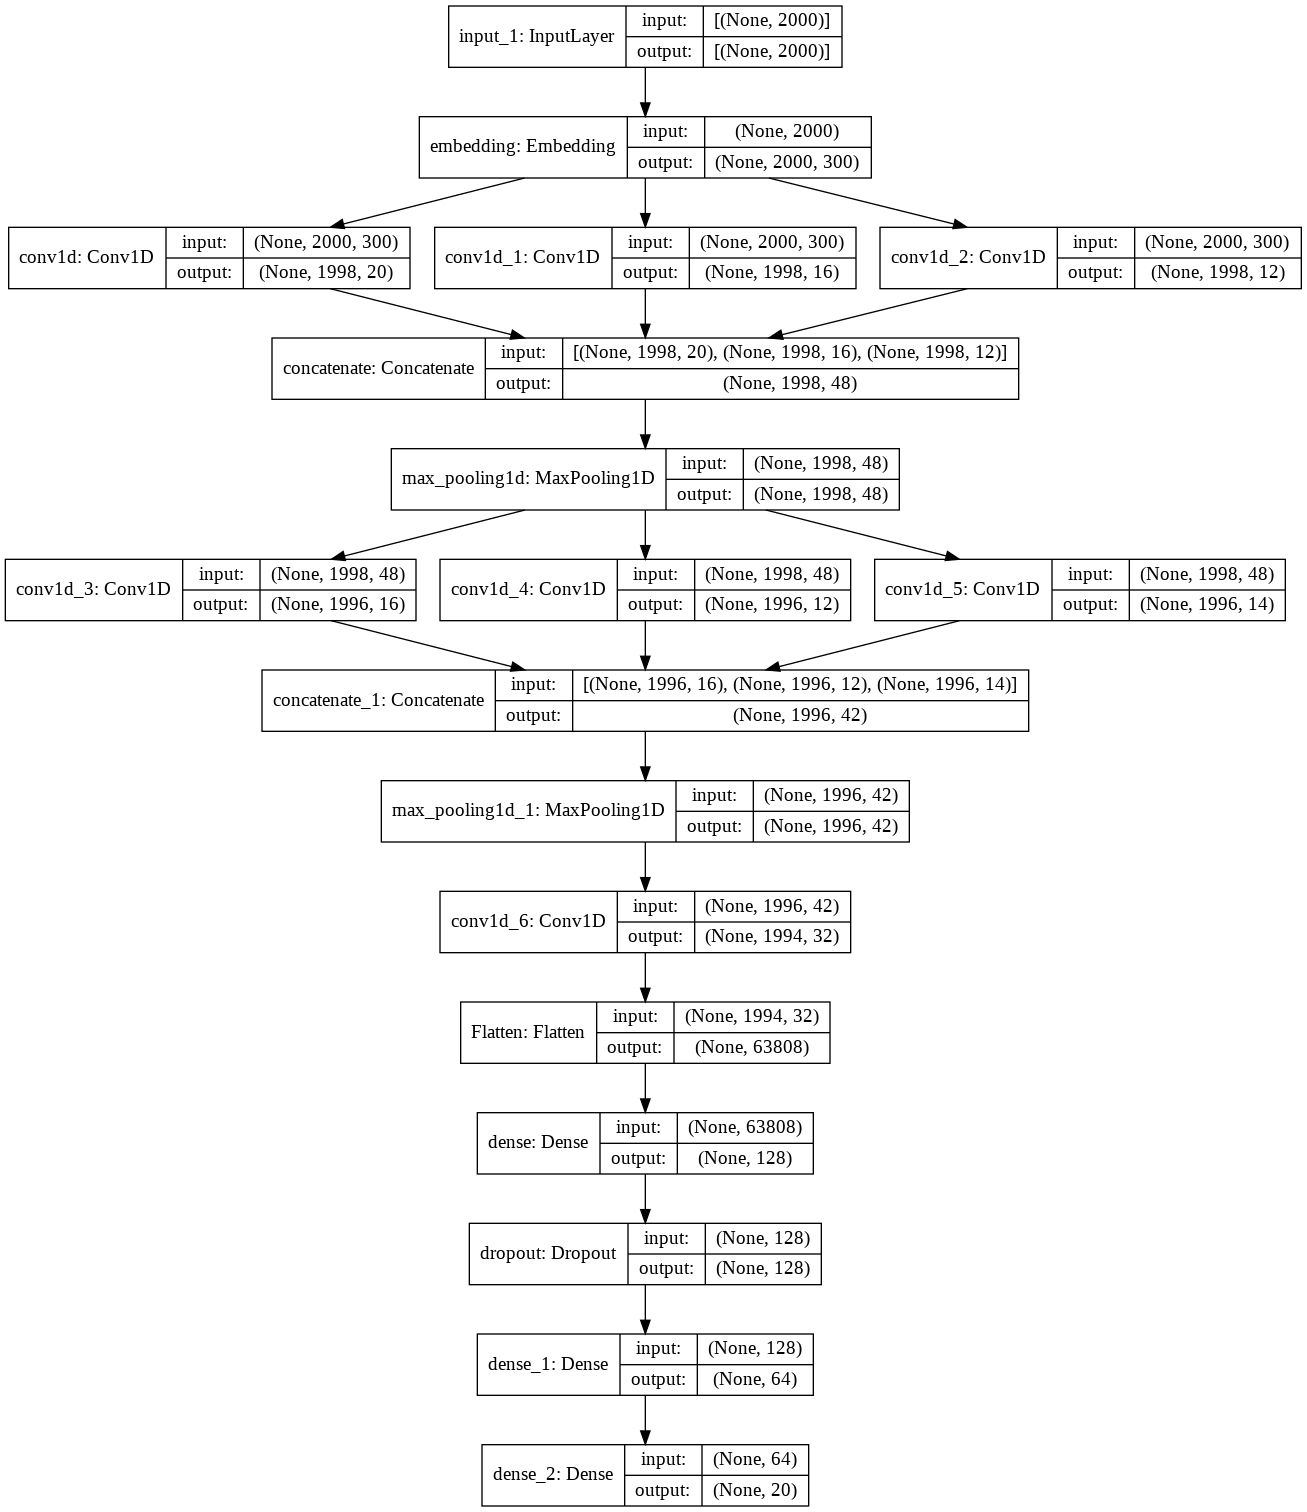

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
path = '/content/drive/MyDrive/document Classification'
checkpoint = ModelCheckpoint(os.path.join(path, 'model_1.hdf5'), monitor = 'val_acc',save_best_only=True)

In [38]:
log_dir="/content/drive/MyDrive/document Classification/log_model_1" + 'log'#datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [39]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [40]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [41]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_m])
history=model1.fit(X_train_seq,y_train_ohe,epochs=30, validation_data=(X_test_seq,y_test_ohe),batch_size=64,callbacks=[tensorboard_callback,earlystop,checkpoint])
# list all data in history
print(history.history.keys())

Epoch 1/30
221/221 [==============================] - 504s 2s/step - loss: 2.9861 - accuracy: 0.1098 - f1_m: 0.0049 - val_loss: 2.5069 - val_accuracy: 0.1806 - val_f1_m: 0.0000e+00
Epoch 2/30
221/221 [==============================] - 501s 2s/step - loss: 2.4764 - accuracy: 0.2080 - f1_m: 0.0297 - val_loss: 2.2626 - val_accuracy: 0.2770 - val_f1_m: 0.0219
Epoch 3/30
221/221 [==============================] - 498s 2s/step - loss: 2.3062 - accuracy: 0.2537 - f1_m: 0.0464 - val_loss: 2.2008 - val_accuracy: 0.2870 - val_f1_m: 0.0622
Epoch 4/30
221/221 [==============================] - 499s 2s/step - loss: 2.1827 - accuracy: 0.2884 - f1_m: 0.0693 - val_loss: 2.0896 - val_accuracy: 0.3142 - val_f1_m: 0.0681
Epoch 5/30
221/221 [==============================] - 498s 2s/step - loss: 2.0999 - accuracy: 0.3124 - f1_m: 0.0919 - val_loss: 2.0496 - val_accuracy: 0.3287 - val_f1_m: 0.0657
Epoch 6/30
221/221 [==============================] - 502s 2s/step - loss: 2.0248 - accuracy: 0.3315 - f1_m: 0.

In [43]:
history.history

{'accuracy': [0.10976559668779373,
  0.20798809826374054,
  0.2536647617816925,
  0.28836485743522644,
  0.3123716413974762,
  0.3314920961856842,
  0.34777989983558655,
  0.3682458698749542,
  0.3798597753047943,
  0.3932441174983978,
  0.40627434849739075,
  0.42688193917274475,
  0.43495503067970276,
  0.4467813968658447,
  0.46129876375198364,
  0.4771616756916046,
  0.48962539434432983,
  0.5006019473075867,
  0.5149776935577393,
  0.5283620357513428,
  0.5410381555557251,
  0.5458536744117737,
  0.5618582367897034,
  0.565753161907196],
 'f1_m': [0.0049117193557322025,
  0.029733752831816673,
  0.046384379267692566,
  0.06929980963468552,
  0.09189262241125107,
  0.10163946449756622,
  0.12580038607120514,
  0.14860700070858002,
  0.16079171001911163,
  0.18230903148651123,
  0.20316354930400848,
  0.22725717723369598,
  0.2384766787290573,
  0.2604447603225708,
  0.28531304001808167,
  0.3007400929927826,
  0.3313504457473755,
  0.3499143123626709,
  0.3740946650505066,
  0.4041

#plot of accuracy on the training and validation 

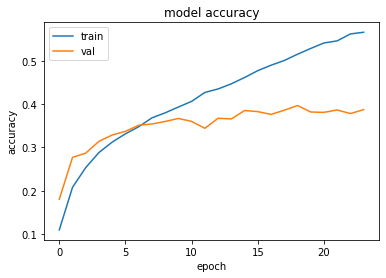

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on train datasets is still rising for the last few epochs.
- while for val(test) it is constant after some epoch.

#plot of loss on the training and validation

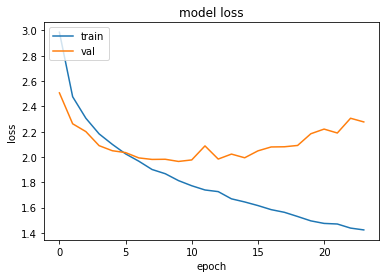

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the above plot of loss, we can see that the model has comparable performance on both train.
- in test we see that after some epcoh is increase .

##Model1(batch normalization):
###(for better performance)

In [34]:
#source:https://github.com/anant123-ai/Document-Classification-with-CNN/blob/main/Copy_of_Text_Classification.ipynb
def model1():
    embedding_layer=Embedding(vocab_size,300,weights=[embedding_matrix], input_length=2000, trainable=False)

    input_layer=Input(shape=(2000,), dtype='int32')

    embedding_layer1=embedding_layer(input_layer)
    #Conv Layer
    Conv1m=Conv1D(filters=20,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=34),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    Conv1n=Conv1D(filters=16,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=35),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    Conv1o=Conv1D(filters=12,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=36),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedding_layer1)
    #concatinating
    concat1=tf.keras.layers.Concatenate()([Conv1m, Conv1n, Conv1o])
    drop =Dropout(0.15)(concat1)
    batch_norm=BatchNormalization()(drop)

    #MaxPool Layer
    Pool1=MaxPool1D(pool_size=1,strides=1)(batch_norm)
    #Conv Layer
    Conv2i=Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    Conv2j=Conv1D(filters=12,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=31),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    Conv2k=Conv1D(filters=14,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=32),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    #concatinating
    concat2=tf.keras.layers.Concatenate()([Conv2i,Conv2j,Conv2k])
    batch_norm = BatchNormalization()(concat2) 
    
    #maxpool layer
    Pool2=MaxPool1D(pool_size=1,strides=1,padding='valid')(batch_norm)
    #Conv Layer
    Conv3p=Conv1D(filters=32,kernel_size=3,strides=1,padding='valid',kernel_regularizer=l2(0.0001),activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=33))(Pool2)
    drop1 =Dropout(0.35)(Conv3p)
    #Flatten
    flatten = Flatten(data_format='channels_last',name='Flatten')(drop1)
                                                                                     
    layer1=Dense(100,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(flatten)
    #dropout_layer
    Dropout_layer1  =  Dropout(0.25)(layer1)
    norm_layer1 = BatchNormalization()(Dropout_layer1)
    layer2 = Dense(50,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.001))(norm_layer1)
    Dropout_layer2 = Dropout(0.35)(layer2)
    norm_layer2 = BatchNormalization()(Dropout_layer2)
    #output layer
    output_layer=Dense(20,activation="softmax",kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(norm_layer2)

    model1=Model(input_layer,output_layer ,name="model_1")
    return model1

In [35]:
model1=model1()
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 2000, 300)    24675600    input_1[0][0]                    
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 1998, 20)     18020       embedding[0][0]                  
__________________________________________________________________________________________________
conv1d_1 (Conv1D)               (None, 1998, 16)     14416       embedding[0][0]                  
____________________________________________________________________________________________

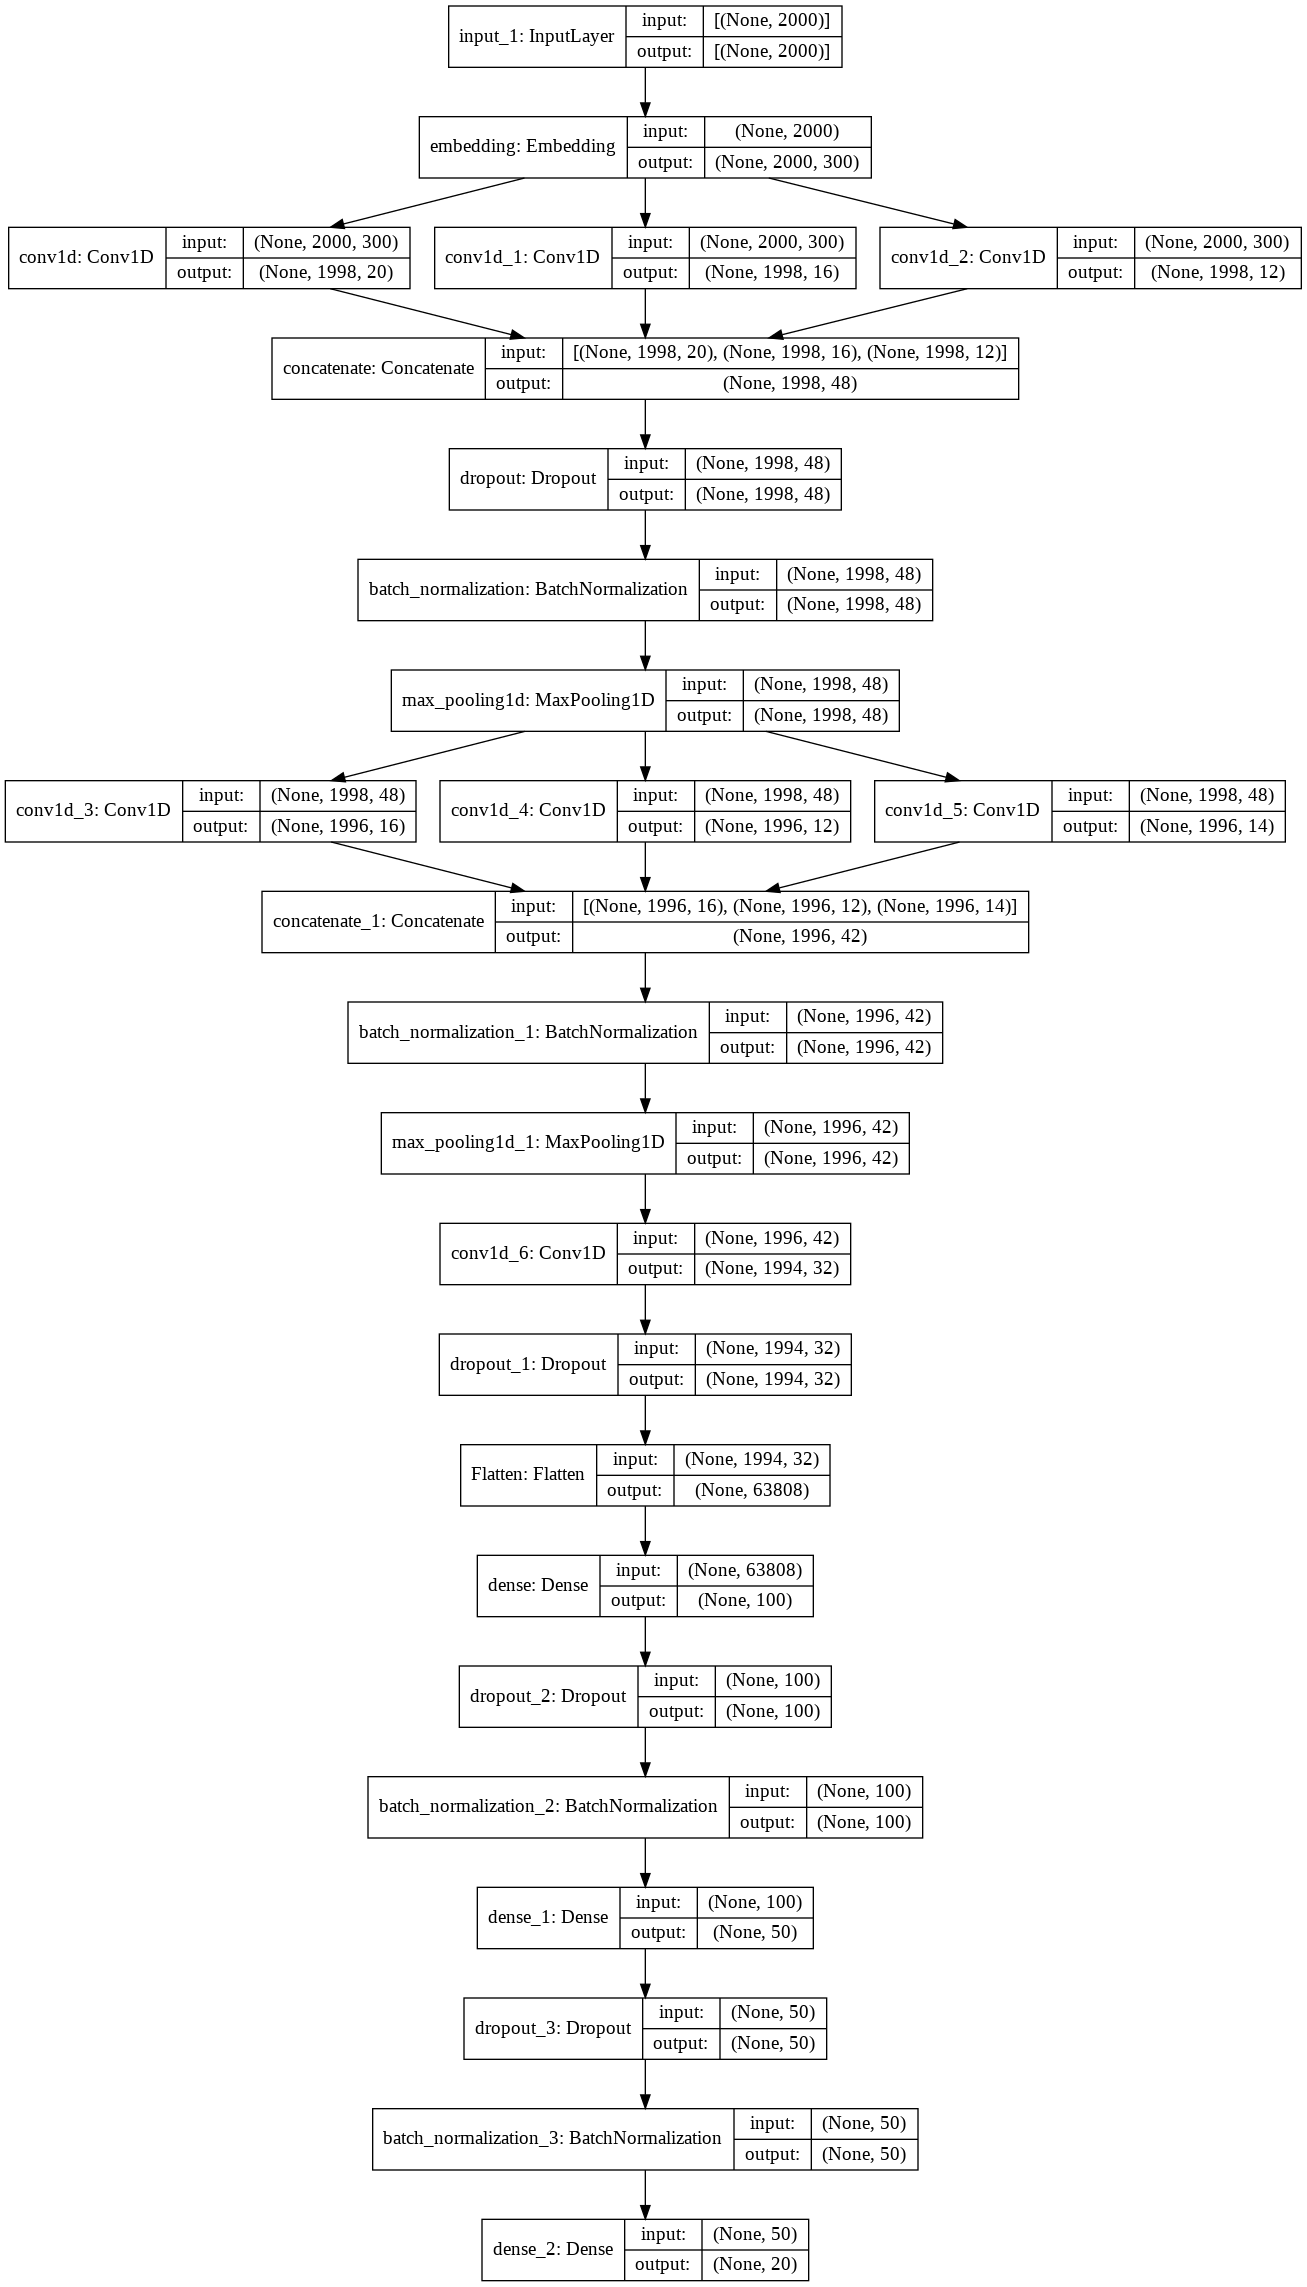

In [36]:
from tensorflow.keras.utils import plot_model
plot_model(model1, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
path = '/content/drive/MyDrive/document Classification'
checkpoint = ModelCheckpoint(os.path.join(path, 'model_1.hdf5'), monitor = 'val_acc',save_best_only=True)

In [38]:
log_dir="/content/drive/MyDrive/document Classification/log_model_1" + 'log'#datetime.utcnow().strftime('%Y-%m-%d %H:%M:%S.%f')
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [39]:
#https://datascience.stackexchange.com/questions/45165/how-to-get-accuracy-f1-precision-and-recall-for-a-keras-model
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [40]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [41]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [42]:
model1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_m])
history=model1.fit(X_train_seq,y_train_ohe,epochs=30, validation_data=(X_test_seq,y_test_ohe),batch_size=40,callbacks=[tensorboard_callback,earlystop,checkpoint])
# list all data in history
print(history.history.keys())

Epoch 1/30
354/354 [==============================] - 531s 1s/step - loss: 3.3743 - accuracy: 0.0802 - f1_m: 0.0042 - val_loss: 2.9620 - val_accuracy: 0.1158 - val_f1_m: 4.1339e-04
Epoch 2/30
354/354 [==============================] - 528s 1s/step - loss: 2.8303 - accuracy: 0.1557 - f1_m: 0.0170 - val_loss: 2.5892 - val_accuracy: 0.1933 - val_f1_m: 0.0186
Epoch 3/30
354/354 [==============================] - 533s 2s/step - loss: 2.4798 - accuracy: 0.2182 - f1_m: 0.0245 - val_loss: 2.3756 - val_accuracy: 0.2577 - val_f1_m: 0.0597
Epoch 4/30
354/354 [==============================] - 536s 2s/step - loss: 2.3237 - accuracy: 0.2544 - f1_m: 0.0293 - val_loss: 2.2082 - val_accuracy: 0.2762 - val_f1_m: 0.0293
Epoch 5/30
354/354 [==============================] - 535s 2s/step - loss: 2.2001 - accuracy: 0.2855 - f1_m: 0.0410 - val_loss: 2.0781 - val_accuracy: 0.3321 - val_f1_m: 0.0526
Epoch 6/30
354/354 [==============================] - 531s 1s/step - loss: 2.1592 - accuracy: 0.2998 - f1_m: 0.

In [43]:
history.history

{'accuracy': [0.08016429096460342,
  0.1556546986103058,
  0.2181856781244278,
  0.2543729245662689,
  0.2854613661766052,
  0.2998371124267578,
  0.3227108418941498,
  0.3471425473690033,
  0.3649883270263672,
  0.381488561630249,
  0.3991926908493042,
  0.4176049828529358,
  0.4279441833496094,
  0.4445860683917999,
  0.4586077332496643,
  0.4608030617237091,
  0.4775157570838928,
  0.4898378252983093,
  0.4975568354129791,
  0.5117201209068298,
  0.5161815881729126,
  0.5263791680335999,
  0.5384179353713989,
  0.5464202165603638,
  0.5479073524475098,
  0.5569719076156616,
  0.569648027420044,
  0.5697896480560303,
  0.5807662606239319,
  0.5826782584190369],
 'f1_m': [0.0042229811660945415,
  0.0169879961758852,
  0.024516958743333817,
  0.02929886057972908,
  0.0410354807972908,
  0.054434534162282944,
  0.06937391310930252,
  0.0985528975725174,
  0.12523403763771057,
  0.1514599472284317,
  0.17188522219657898,
  0.2088117152452469,
  0.2388947308063507,
  0.27037233114242554,


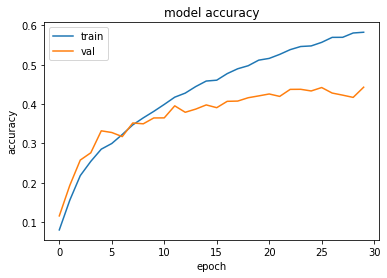

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on train datasets is still rising for the last few epochs.
- by comparing without normalization we see that it give slighty good acuuracy for val(test).

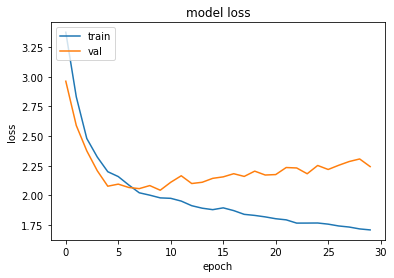

In [45]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the above plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test).
- if these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

### Model-2 : Using 1D convolutions with character embedding

<pre>
<pre><img src="https://i.ytimg.com/vi/CNY8VjJt-iQ/maxresdefault.jpg" width="70%">
Here are the some papers based on Char-CNN
 1. Xiang Zhang, Junbo Zhao, Yann LeCun. <a href="http://arxiv.org/abs/1509.01626">Character-level Convolutional Networks for Text Classification</a>.NIPS 2015
 2. Yoon Kim, Yacine Jernite, David Sontag, Alexander M. Rush. <a href="https://arxiv.org/abs/1508.06615">Character-Aware Neural Language Models</a>. AAAI 2016
 3. Shaojie Bai, J. Zico Kolter, Vladlen Koltun. <a href="https://arxiv.org/pdf/1803.01271.pdf">An Empirical Evaluation of Generic Convolutional and Recurrent Networks for Sequence Modeling</a>
 4. Use the pratrained char embeddings <a href='https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt'>https://github.com/minimaxir/char-embeddings/blob/master/glove.840B.300d-char.txt</a>
</pre>

In [56]:
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
t=  Tokenizer(
    num_words=300,
    filters='',
    lower=False,
    split=" ",
    char_level=True,
    oov_token=None,
    document_count=0,
)
t.fit_on_texts(X_train['preprocessed_full_text'].tolist())

In [57]:
max_length = 300

sequences = t.texts_to_sequences(list(X_train['preprocessed_full_text'].values))
pre_pad_train_char = pad_sequences(sequences,maxlen=max_length, padding='pre')

sequences = t.texts_to_sequences(list(X_test['preprocessed_full_text'].values))
pre_pad_test_char = pad_sequences(sequences,maxlen=max_length, padding='pre')
print(pre_pad_train_char.shape,pre_pad_test_char.shape)

(14121, 300) (4707, 300)


In [58]:
print(len(sequences))

4707


In [59]:
vocab_size_char = len(t.word_index) + 1
print(vocab_size_char)

65


In [62]:
# truncate and/or pad input sequences
max_review_length = 1800
X_train_seq_char = sequence.pad_sequences(pre_pad_train_char, maxlen=max_review_length)
X_test_seq_char  = sequence.pad_sequences(pre_pad_test_char , maxlen=max_review_length)

In [63]:
X_train_seq_char.shape

(14121, 1800)

In [64]:
X_test_seq_char.shape

(4707, 1800)

In [65]:
# create a weight matrix for words in training docs
import numpy as np
embedding_matrix_char = np.zeros((vocab_size_char, 300))
for word, i in tqdm(t.word_index.items()):
    embedding_vector = glove_words.get(word)
    if embedding_vector is not None:
        embedding_matrix_char[i] = embedding_vector

100%|██████████| 64/64 [00:00<00:00, 192703.13it/s]


In [66]:
embedding_matrix_char.shape

(65, 300)

In [67]:
def model2():
    Embedding_layer=Embedding(vocab_size_char,300,weights=[embedding_matrix_char], input_length=1800, trainable=False)
    input_layer=Input(shape=(1800,), dtype='int32')
    embedded_sequences=Embedding_layer(input_layer)
    #Conv Layer
    Convm=Conv1D(filters=32,kernel_size=3,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(embedded_sequences)
    #Conv Layer
    Convn=Conv1D(filters=16,kernel_size=5,activation='relu',strides=1,padding='valid',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Convm)
    #MaxPool Layer 
    Pool1 =MaxPool1D(pool_size=2,strides=1,padding='valid')(Convn)
    #Conv Layer
    Convk=Conv1D(filters=16,kernel_size=3,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Pool1)
    #Conv Layer
    Convt =Conv1D(filters=16,kernel_size=5,strides=1,padding='valid',activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=tf.keras.regularizers.l2(l2=0.00001))(Convk)
    #MaxPool Layer
    Pool2 =MaxPool1D(pool_size=2,strides=1,padding='valid')(Convt)
    #Flatten
    flatten =Flatten()(Pool2)
    #dropout Layer
    dropout_layer=Dropout(0.5)(flatten)
    # dense layer3                                                                                    
    dense_layer=Dense(128,activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=28),kernel_regularizer=tf.keras.regularizers.l2(l2=0.01))(dropout_layer)
    output_layer=Dense(20,activation="softmax",kernel_initializer=tf.keras.initializers.glorot_normal(seed=3))(dense_layer)

    model2=Model(input_layer,output_layer,name="model_2")

    return model2

In [68]:
model2=model2()
model2.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 1800)]            0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 1800, 300)         19500     
_________________________________________________________________
conv1d_7 (Conv1D)            (None, 1798, 32)          28832     
_________________________________________________________________
conv1d_8 (Conv1D)            (None, 1794, 16)          2576      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 1793, 16)          0         
_________________________________________________________________
conv1d_9 (Conv1D)            (None, 1791, 16)          784       
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 1787, 16)          1296

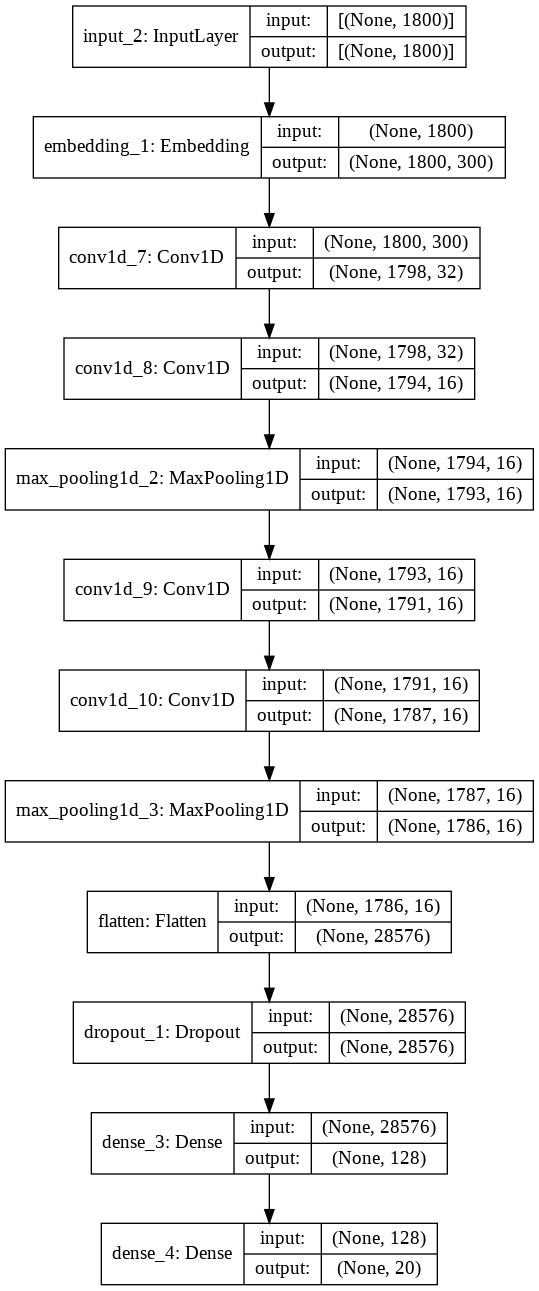

In [69]:
# summarize the model
from tensorflow.keras.utils import plot_model
plot_model(model2, 'model.png', show_shapes=True)

In [70]:
#optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
#earlystop
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',min_delta=0.0005, patience=5, verbose=1)
path = '/content/drive/MyDrive/document Classification'
checkpoint = ModelCheckpoint(os.path.join(path, 'model_2.hdf5'), monitor = 'val_acc',save_best_only=True)

In [71]:
log_dir="/content/drive/MyDrive/document Classification/logs_Model2" + 'log'
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1, write_graph=True,write_grads=True)

In [72]:
import tensorflow.keras.backend as K

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

In [78]:
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [79]:
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [82]:
model2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',f1_m])
history=model2.fit(X_train_seq_char,y_train_ohe,epochs=20,batch_size=40,validation_data=(X_test_seq_char,y_test_ohe),callbacks=[tensorboard_callback,earlystop,checkpoint])

Epoch 1/20
354/354 [==============================] - 234s 658ms/step - loss: 3.0676 - accuracy: 0.0609 - f1_m: 0.0000e+00 - val_loss: 3.0611 - val_accuracy: 0.0775 - val_f1_m: 0.0000e+00
Epoch 2/20
354/354 [==============================] - 228s 643ms/step - loss: 3.0340 - accuracy: 0.0784 - f1_m: 1.3780e-04 - val_loss: 3.0484 - val_accuracy: 0.0763 - val_f1_m: 0.0000e+00
Epoch 3/20
354/354 [==============================] - 226s 640ms/step - loss: 3.0211 - accuracy: 0.0901 - f1_m: 1.3780e-04 - val_loss: 3.0018 - val_accuracy: 0.0826 - val_f1_m: 0.0000e+00
Epoch 4/20
354/354 [==============================] - 250s 707ms/step - loss: 3.0107 - accuracy: 0.0977 - f1_m: 1.3780e-04 - val_loss: 3.0052 - val_accuracy: 0.1088 - val_f1_m: 0.0000e+00
Epoch 5/20
354/354 [==============================] - 227s 642ms/step - loss: 2.9968 - accuracy: 0.1096 - f1_m: 0.0018 - val_loss: 2.9718 - val_accuracy: 0.1183 - val_f1_m: 8.2679e-04
Epoch 6/20
354/354 [==============================] - 250s 707ms

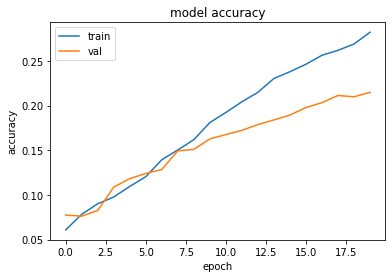

In [83]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the plot of accuracy we can see that the model could probably be trained a little more as the trend for accuracy on train datasets is still rising for the last few epochs.


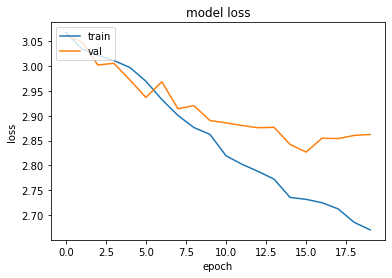

In [84]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

- From the above plot of loss, we can see that the model has comparable performance on both train and validation datasets (labeled test).
- If these parallel plots start to depart consistently, it might be a sign to stop training at an earlier epoch.

#Conclusion:

In [46]:
from prettytable import PrettyTable
table = PrettyTable()
table.title = " Model Comparision "
table.field_names = ["Model1",'Features','train_accuracy','test_acurray']
table.add_row(["model1","word_embedding","0.5658 ","0.3873 "])
table.add_row(["model1(with batch normalization)","word_embedding","0.5827","0.4430"])
table.add_row(["model2","character_embedding","0.2821  ","0.2148"])
print(table)

+----------------------------------------------------------------------------------------+
|                                   Model Comparision                                    |
+----------------------------------+---------------------+----------------+--------------+
|              Model1              |       Features      | train_accuracy | test_acurray |
+----------------------------------+---------------------+----------------+--------------+
|              model1              |    word_embedding   |    0.5658      |   0.3873     |
| model1(with batch normalization) |    word_embedding   |     0.5827     |    0.4430    |
|              model2              | character_embedding |    0.2821      |    0.2148    |
+----------------------------------+---------------------+----------------+--------------+


##Refernce:
- https://colab.research.google.com/drive/1xuxWRl_DOcS5XjaofD0l9YD3-OFUZ7QU#scrollTo=GC6SBG5AYv1f
- https://github.com/anant123-ai/Document-Classification-with-CNN/blob/main/Copy_of_Text_Classification.ipynb